# EDA on skstinfo data

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Sampling 10% of data from skstinfo

In [8]:
#read in data
skstinfo = pd.read_csv('skstinfo.csv', header = 0)
skstinfo.head()

,sku,store,cost,retail,unknown
0,3,102,123.36,440.0,0
1,3,103,123.36,440.0,0
2,3,104,123.36,440.0,0
3,3,202,123.36,440.0,0
4,3,203,123.36,440.0,0


In [13]:
#sample 10% of data for EDA
skstinfo_sample = skstinfo.sample(frac=0.1)
skstinfo_sample.shape

(3923015, 5)

In [15]:
#save the sampled data
skstinfo_sample.to_csv("skstinfo_sample.csv", index = False)

## Descriptive Statistics

In [18]:
skstinfo_sample.describe()

,sku,store,cost,retail,unknown
count,3.923015e+06,3.923015e+06,3.923015e+06,3.923015e+06,3.923015e+06
mean,4.964487e+06,4.509679e+03,2.414647e+01,4.331048e+01,6.243387e-02
std,2.871678e+06,2.802965e+03,4.046671e+01,8.364475e+01,2.419419e-01
min,3.000000e+00,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.501294e+06,2.203000e+03,9.000000e+00,1.299000e+01,0.000000e+00
50%,4.920529e+06,4.207000e+03,1.535000e+01,2.450000e+01,0.000000e+00
75%,7.442780e+06,7.007000e+03,2.676000e+01,4.500000e+01,0.000000e+00
max,9.999997e+06,9.909000e+03,1.710960e+03,4.080000e+03,1.000000e+00


In [19]:
skstinfo_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3923015 entries, 35754346 to 36457611
Data columns (total 5 columns):
 #   Column   Dtype  
---  ------   -----  
 0   sku      int64  
 1   store    int64  
 2   cost     float64
 3   retail   float64
 4   unknown  int64  
dtypes: float64(2), int64(3)
memory usage: 179.6 MB


## Distribution of the **cost** of the stocked items

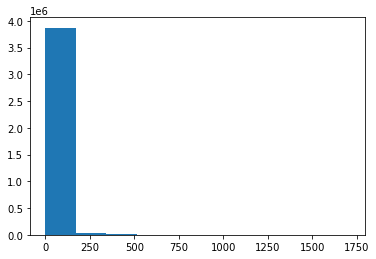

In [23]:
plt.hist(skstinfo_sample['cost'])
plt.show()

- The cost price is mainly from 0-250

## Distribution of the **retail** price of the stocked items

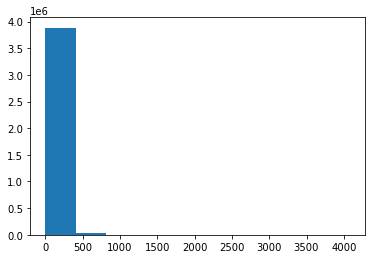

In [24]:
plt.hist(skstinfo_sample['retail'])
plt.show()

- The retail price is mainly from 0-500

## Distribution of product popularity: number of stores have each item in stock

(array([3.35001e+05, 7.68810e+04, 4.05800e+04, 2.01110e+04, 1.89530e+04,
        1.39810e+04, 1.00250e+04, 2.51000e+03, 4.87000e+02, 3.20000e+01]),
 array([ 1. ,  6.5, 12. , 17.5, 23. , 28.5, 34. , 39.5, 45. , 50.5, 56. ]),
 <BarContainer object of 10 artists>)

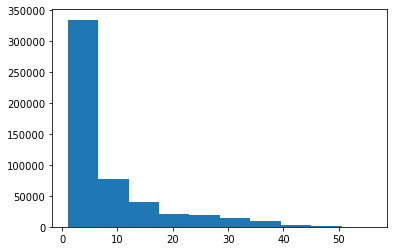

In [36]:
plt.hist(skstinfo_sample.sku.value_counts())

- Products are mostly distributed across <20 stores

## Top 20 popular products that are in stock across the stores

In [69]:
# top 20 popular products that are in stock 
sku_top20 = skstinfo_sample.sku.value_counts().iloc[:20].index

In [70]:
df_sku_top20 = skstinfo_sample[skstinfo_sample['sku'].isin(sku_top20)]
df_sku_top20

,sku,store,cost,retail,unknown
8812770,2260597,3409,9.60,17.0,0
38201913,9741064,1109,17.10,28.5,0
36927275,9402188,2602,18.60,31.0,0
16470773,4156835,6109,14.88,35.0,0
4232126,1070026,709,13.75,42.0,0
...,...,...,...,...,...
5695822,1456627,2104,30.00,69.0,1
22003448,5520671,9609,2.88,7.0,0
7508513,1929007,7502,30.00,60.0,0
16281195,4106915,6204,8.10,18.0,0


## Retail price distribution for the top 20 popular products

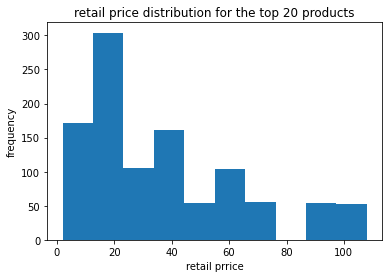

In [75]:
plt.hist(df_sku_top20['retail'])
plt.title("retail price distribution for the top 20 products")
plt.xlabel('retail prrice')
plt.ylabel('frequency')
plt.show()

- Retail prices for the top 20 popular products distributes unevenly

## Average retail price for each product across all stores

In [76]:
df_sku_top20_avg_price = df_sku_top20.groupby(['sku']).agg(avg_retail_price = ('retail', 'mean'))
df_sku_top20_avg_price

,avg_retail_price
sku,
1070026,42.000000
1456627,69.000000
1929007,60.000000
2260597,17.000000
3151740,16.000000
4106915,18.000000
4156835,35.000000
5181713,65.000000
5520671,7.000000


## The least 20 popular products that are in stock across the stores

In [73]:
sku_last20 = skstinfo_sample.sku.value_counts().iloc[-20:].index
df_sku_last20 = skstinfo_sample[skstinfo_sample['sku'].isin(sku_last20)]
df_sku_last20

,sku,store,cost,retail,unknown
3509908,886369,6002,9.63,17.50,0
4543423,1151482,5504,8.10,13.50,0
30364531,7676606,2604,31.50,84.00,0
15642564,3949072,9806,6.50,13.00,0
26683850,6720639,1509,98.00,198.00,0
20579195,5168883,4202,23.75,29.50,0
26610923,6699776,4904,18.50,17.25,1
26264662,6608284,2203,32.37,20.00,0
6058696,1553985,1904,15.47,34.00,0
17555323,4416462,4504,35.67,22.25,0


## Retail price distribution for the least 20 popular products

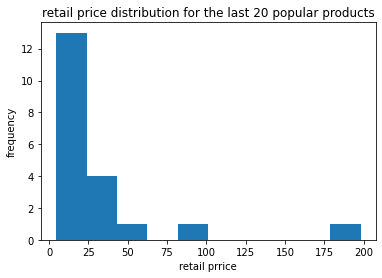

In [74]:
plt.hist(df_sku_last20['retail'])
plt.title("retail price distribution for the last 20 popular products")
plt.xlabel('retail prrice')
plt.ylabel('frequency')
plt.show()

- Retail prices for the least 20 popular products distributes unevenly, and mostly cost <50

## Average retail price for each product across all stores

In [77]:
df_sku_last20_avg_price = df_sku_last20.groupby(['sku']).agg(avg_retail_price = ('retail', 'mean'))
df_sku_last20_avg_price

,avg_retail_price
sku,
886369,17.50
1151482,13.50
1553985,34.00
1709018,12.25
2783594,18.75
3480842,11.50
3767611,32.00
3949072,13.00
3969482,27.00


In [78]:
#calculate average price for the last 20 popular products
np.mean(df_sku_last20_avg_price['avg_retail_price'])

32.281

In [79]:
#calculate average price for the top 20 popular products
np.mean(df_sku_top20_avg_price['avg_retail_price'])

36.00624727866473

## Summary of findings:
- The cost price is mainly from 0-250
- The retail price is mainly from 0-500
- Products are mostly distributed across <20 stores
- Retail prices for the top 20 popular products distributes unevenly
- Retail prices for the least 20 popular products distributes unevenly, and mostly cost <50
- The average retail price for the top 10 products and last 10 products are pretty similar, so retail price may not play an influential role on product popularity.
